<a href="https://colab.research.google.com/github/Alexanderdivv/Rock-Papper-Scissors/blob/main/RockScissorsPapper_AlexanderDGBangun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rock Scissors Papper
By:
Alexander Diva Grael Bangun<br>
Belajar Machine Learning Untuk Pemula 2021<br>
email: alexanderdivagraelbangun@gmail.com


In [ ]:
#import library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from sklearn.model_selection import train_test_split

In [ ]:
#import dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-27 09:32:08--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.99MB/s    in 4m 7s   

2021-05-27 09:36:17 (1.24 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#ekstrak dataset
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#separate dataset
import shutil
original = [(r'/tmp/rockpaperscissors/paper'), (r'/tmp/rockpaperscissors/rock'), (r'/tmp/rockpaperscissors/scissors')]
target = [(r'/tmp/images/paper'), (r'/tmp/images/rock'), (r'/tmp/images/scissors')]

for i in range(len(target)):
  shutil.move(original[i],target[i])

In [ ]:
#pathing dataset
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir,'train')
validate_dir = os.path.join(base_dir, 'val')

In [ ]:
rock_dir = os.path.join(base_dir, 'rock')
scissors_dir = os.path.join(base_dir, 'scissors')
paper_dir = os.path.join(base_dir, 'paper')

#creating directory for data
os.mkdir(train_dir)
os.mkdir(validate_dir)

#join each dir and seperate to val and train 

In [ ]:
#set validation data size dan split semua kategori
train_rock_dir, validate_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_scissors_dir, validate_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)
train_paper_dir, validate_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

In [ ]:
#set dir untuk semua katergoti di tiap direktori 
train_rock = os.path.join(train_dir, 'rock')
validate_rock = os.path.join(validate_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
validate_paper = os.path.join(validate_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
validate_scissors = os.path.join(validate_dir, 'scissors')

#buat direktori
os.mkdir(train_rock)
os.mkdir(validate_rock)
os.mkdir(train_scissors)
os.mkdir(validate_scissors)
os.mkdir(train_paper)
os.mkdir(validate_paper)

In [ ]:
#untuk cut file
for gambar in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, gambar), os.path.join(train_rock, gambar))

for gambar in validate_rock_dir:
  shutil.copy(os.path.join(rock_dir, gambar), os.path.join(validate_rock, gambar))
  
for gambar in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, gambar), os.path.join(train_scissors, gambar))

for gambar in validate_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, gambar), os.path.join(validate_scissors, gambar))

for gambar in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, gambar), os.path.join(train_paper, gambar))

for gambar in validate_paper_dir:
  shutil.copy(os.path.join(paper_dir, gambar), os.path.join(validate_paper, gambar))

In [ ]:
print(len(os.listdir('/tmp/images/train/paper')))
print(len(os.listdir('/tmp/images/train/scissors')))
print(len(os.listdir('/tmp/images/train/rock')))

print(len(os.listdir('/tmp/images/val/paper')))
print(len(os.listdir('/tmp/images/val/scissors')))
print(len(os.listdir('/tmp/images/val/rock')))


427
450
435
285
300
291


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range = 0.2,
    horizontal_flip=True)

validate_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range = 0.2,
    horizontal_flip=True)

train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(150, 150), 
                                               color_mode='rgb',
                                               batch_size=32, 
                                               class_mode='categorical',
                                               shuffle=True,) 

validate_data = validate_datagen.flow_from_directory(validate_dir, 
                                           target_size=(150, 150), 
                                           color_mode='rgb',
                                           batch_size=32, 
                                           class_mode='categorical',
                                           shuffle=False)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
#loss function, menggunakan Adam untuk optimizer,metric
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics = ['accuracy'])


In [ ]:
#running model dengan fit
running = model.fit(train_data,
                    steps_per_epoch = 30,
                    epochs = 20,
                    validation_data = validate_data,
                    validation_steps = 5,
                    verbose = 1)

Epoch 1/20
30/30 [==============================] - 49s 2s/step - loss: 0.9922 - accuracy: 0.4969 - val_loss: 1.3066 - val_accuracy: 0.3000
Epoch 2/20
30/30 [==============================] - 48s 2s/step - loss: 0.4223 - accuracy: 0.8458 - val_loss: 0.4024 - val_accuracy: 0.8562
Epoch 3/20
30/30 [==============================] - 48s 2s/step - loss: 0.2758 - accuracy: 0.8958 - val_loss: 0.6023 - val_accuracy: 0.7500
Epoch 4/20
30/30 [==============================] - 48s 2s/step - loss: 0.2629 - accuracy: 0.9094 - val_loss: 0.3225 - val_accuracy: 0.9062
Epoch 5/20
30/30 [==============================] - 49s 2s/step - loss: 0.1808 - accuracy: 0.9344 - val_loss: 0.2121 - val_accuracy: 0.9062
Epoch 6/20
30/30 [==============================] - 49s 2s/step - loss: 0.1539 - accuracy: 0.9521 - val_loss: 0.0974 - val_accuracy: 0.9688
Epoch 7/20
30/30 [==============================] - 48s 2s/step - loss: 0.1440 - accuracy: 0.9563 - val_loss: 0.0968 - val_accuracy: 0.9688
Epoch 8/20
30/30 [==

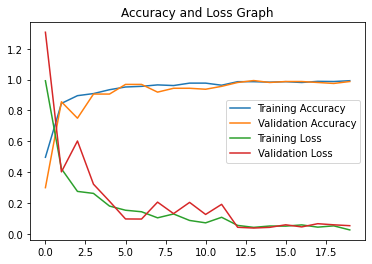

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(plt.plot(running.history['accuracy'], 
               label='Training Accuracy'))
plt.plot(running.history['val_accuracy'],
         label='Validation Accuracy')
plt.plot(running.history['loss'],
         label='Training Loss')
plt.plot(running.history['val_loss'],
         label='Validation Loss')
plt.title('Accuracy and Loss Graph')
plt.legend()
plt.show()

Saving testing.png to testing.png
{'testing.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xb8\x00\x00\x01<\x08\x06\x00\x00\x00\xb2\xeb\xa4}\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x0e\xc3\x00\x00\x0e\xc3\x01\xc7o\xa8d\x00\x00\xff\xa5IDATx^\xec\xfd\xdb\xaf-\xdb\xb7\xdf\x07\x8dy]k\xed\xbd\x7f\xe7\xf7;>\xf69N\x1c+\x89 \t\x818&V0\x18\xc7\x06D$\xc7\x89c#!\x14E\\\x02"\x0e\x8a\xc4\x03\xd7\x90\x04\x1e\xb6\x90x\xe1\x12bx\x00\x91\xeb#\xaf\xbcp\x13\xe2&\x01!\x11\x7fA\x1e#\xf0\x89\xeds\xfd\xdd\xf6\x9aW\xbe\x9fo\xeb\xad\xaaU\x8d^5j\xcc9\xe6Zs\xed=\xbfc\xb6\xd9o\xad\xb7\xdez\xeb\xbdz\xab^U\xa3\xc6\xd9_\xf8\x9f\xfc=\x8f\xbb\x86\xb3\xf3\xb3\x16S\xfc\xecl7\x14\x00\xa5\xa7x\xdc\x91\x03\x1f\xf1)\n\xaf\xa2c\x03\x11?\x7f\x8cr\xb7\xf1\x18\xa5g\xedC*\x9a\xd2\xbfZ\xb7\x83&&\xa0Jgg\x0f-\xe1\xaa\rHp\xab\xca;o\xc2I\xdf+\x1ee\xd1\x07G\x05\xf1\xeca\xd2P\x0bA\x8d\xef#\xe4\xae\xf3\x04\xdcp\x17U7b\x93>;O6\x1bY\x0c\xf2\x02\xf4\xadE\x8

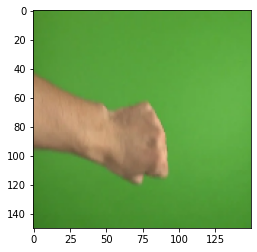

In [ ]:
#testing
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

test_image = files.upload()

for fUploaded in test_image.keys():
  #melakukan prediksi
  path = fUploaded
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  kategori = model.predict(images, batch_size=10)

  print(test_image)
  if kategori[0][0] == 1:
    print('Paper')
  elif kategori[0][1] == 1:
    print('Rock')
  else:
    print('Scissors')


#notes
1. dataset yang digunakan: 
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
2. pembagian dataset: train set & validation set
3. data validation 40%, jumlah keseluruhan data = 2188 (874 data validasi, 1314 data training)
4. menggunakan image data generator
  mengimplementasikan augmentasi gambar
  model sequential
  train model <= 30 menit
  akurasi >= 85%
5. menambah data diri pada submission

6. menggunakan > 1 hidden layer
7. menerapkan lebih banyak augmentasi gambar
8. menggunakan optimizer dan loss-function
  loss-function menggunakan categorical entropy